In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from nettools.monoplex import NetworkGenerator 
from nettools.multiplex import MultiplexConstructor
from nettools.multiplex import InterMeasures

# Generating synthetic networks
In this experiment I generate few synthetic networks, in purpose to examinate their properties
and find best candidates for future experiment. To realize this aim I implement few methods and classes, which are able to construct Multiplex networks.

#### Generate signle layer networks

In [68]:
ng = NetworkGenerator(300)
network_ba_1 = ng.ba_network(m0=15)
network_ba_2 = ng.ba_network(m0=20)
network_er_1 = ng.er_network(p=0.1)
network_er_2 = ng.er_network(p=0.3)

#### Generate correlated networks for Barabassi Albert networks

In [69]:
mc = MultiplexConstructor()

In [123]:
network_corr_ba_1 = mc.rewire_hubs(network_ba_1, rsteps=5000)
network_corr_ba_2 = mc.rewire_hubs(network_ba_2, rsteps=150)

#### Construct Multiplex networks

In [124]:
multi_er_er = mc.construct(network_er_1, network_er_2)
multi_er_ba = mc.construct(network_er_1, network_ba_1)
multi_ba_ba_nc = mc.construct(network_ba_2, network_ba_1)
multi_ba_ba_corr_1 = mc.construct(network_ba_1, network_corr_ba_1)
multi_ba_ba_corr_2 = mc.construct(network_ba_2, network_corr_ba_2)

# Measure network properties
After network generation and construction, examine basic network properties

## Degree correlations
Degree correlation as conditional probability, that node i have degree k given degree d on other layer. 

#### ER - ER

In [126]:
n_layers = multi_er_er.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_er_er.network[:, :, layer_ref], 
            multi_er_er.network[:, :, layer_test]
        )

In [127]:
corr_matrix

array([[ 1.,  0.],
       [ 0.,  1.]])

#### ER - BA

In [128]:
n_layers = multi_er_ba.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_er_ba.network[:, :, layer_ref], 
            multi_er_ba.network[:, :, layer_test]
        )

In [129]:
corr_matrix

array([[ 1.        ,  0.06666667],
       [ 0.06666667,  1.        ]])

#### BA - BA

In [130]:
n_layers = multi_ba_ba_nc.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_ba_nc.network[:, :, layer_ref], 
            multi_ba_ba_nc.network[:, :, layer_test]
        )

In [131]:
corr_matrix

array([[ 1.        ,  0.01333333],
       [ 0.01333333,  1.        ]])

#### BA - BA [Correlation]

In [132]:
n_layers = multi_ba_ba_corr_1.network.shape[2]
corr_matrix = np.zeros((n_layers, n_layers))
for layer_ref in range(n_layers):
    for layer_test in range(n_layers):
        corr_matrix[layer_ref, layer_test] = InterMeasures.degree_conditional(
            multi_ba_ba_corr_1.network[:, :, layer_ref], 
            multi_ba_ba_corr_1.network[:, :, layer_test]
        )

In [133]:
corr_matrix

array([[ 1.,  1.],
       [ 1.,  1.]])

## Degree distribution
Degree distribution for each network.

#### ER - ER

In [134]:
deg_dist_erer = InterMeasures.degree_distribution(multi_er_er.network)
kcorr_erer = InterMeasures.kendal_corr(deg_dist_erer)

<IPython.core.display.Javascript object>


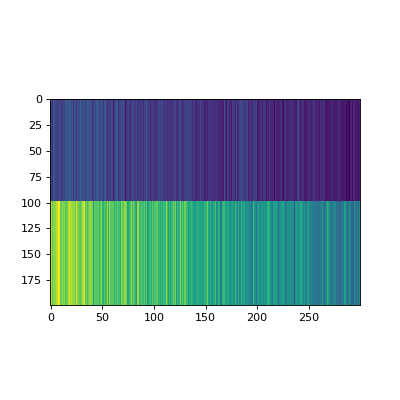

In [135]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_erer, 100, axis=0))
plt.show()

#### ER - BA

In [136]:
deg_dist_erba = InterMeasures.degree_distribution(multi_er_ba.network)
kcorr_erba = InterMeasures.kendal_corr(deg_dist_erba)

<IPython.core.display.Javascript object>


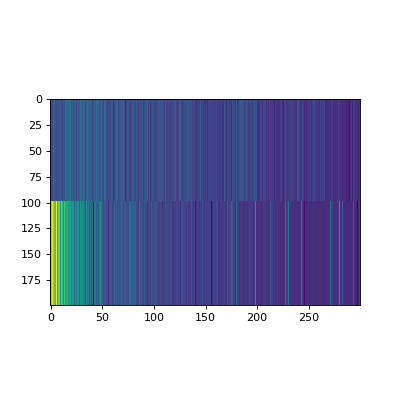

In [137]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_erba, 100, axis=0))
plt.show()

#### BA - BA

In [138]:
deg_dist_baba = InterMeasures.degree_distribution(multi_ba_ba_nc.network)
kcorr_baba = InterMeasures.kendal_corr(deg_dist_baba)

<IPython.core.display.Javascript object>


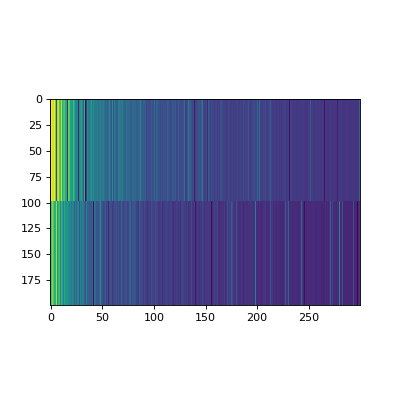

In [139]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_baba, 100, axis=0))
plt.show()

#### BA - BA [Correlated]

In [140]:
deg_dist_baba_corr = InterMeasures.degree_distribution(multi_ba_ba_corr_1.network)
kcorr_baba_corr = InterMeasures.kendal_corr(deg_dist_baba_corr)

<IPython.core.display.Javascript object>


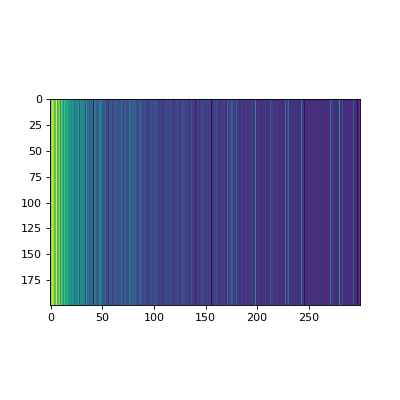

In [141]:
fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.repeat(deg_dist_baba_corr, 100, axis=0))
plt.show()

# Participation coefficient
Participation coefficient measure in how many layer node participate.

#### ER - ER

In [142]:
agg_net_erer = InterMeasures.aggregate(multi_er_er.network)

<IPython.core.display.Javascript object>


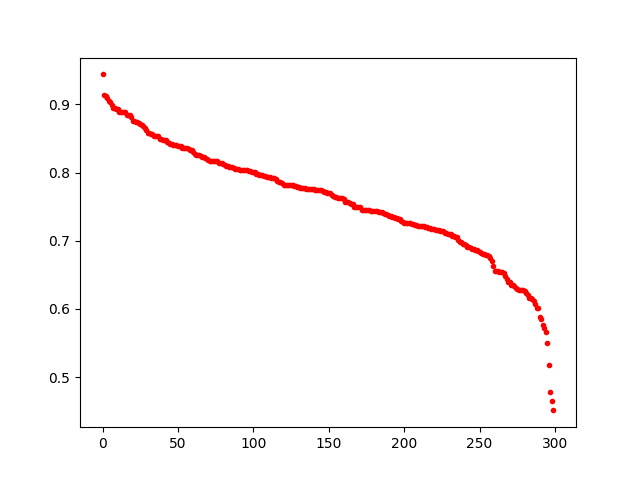

In [143]:
pc_erer = InterMeasures.participation_coeff(multi_er_er.network, agg_net_erer)
plt.figure()
plt.plot(np.sort(pc_erer)[::-1], '.r')
plt.show()

#### ER - BA

In [144]:
agg_net_erba = InterMeasures.aggregate(multi_er_ba.network)

<IPython.core.display.Javascript object>


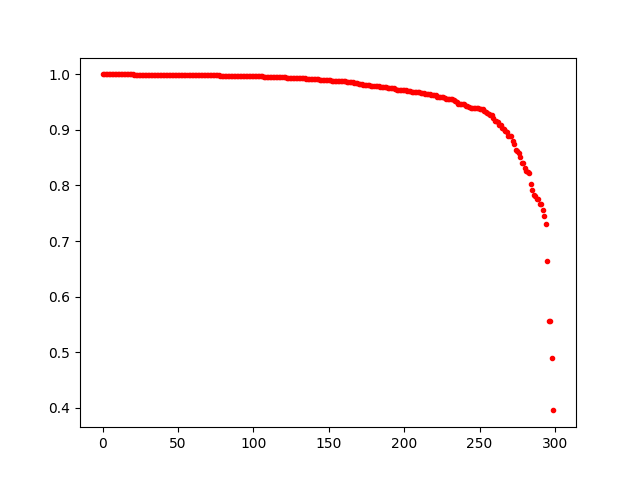

In [145]:
pc_erba = InterMeasures.participation_coeff(multi_er_ba.network, agg_net_erba)
plt.figure()
plt.plot(np.sort(pc_erba)[::-1], '.r')
plt.show()

#### BA - BA

In [146]:
agg_net_baba_nc = InterMeasures.aggregate(multi_ba_ba_nc.network)

<IPython.core.display.Javascript object>


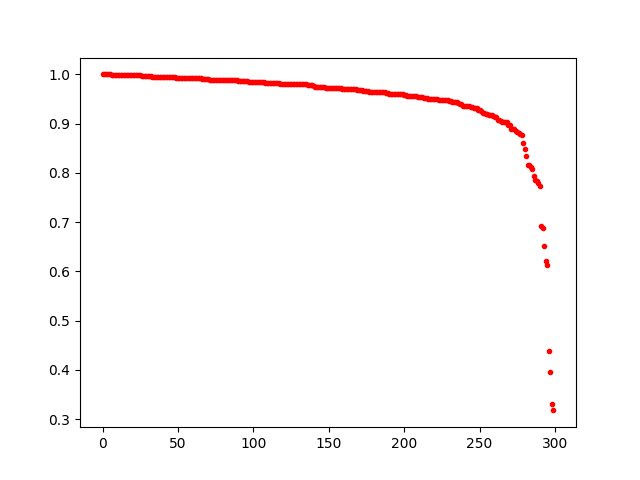

In [147]:
pc_baba_nc = InterMeasures.participation_coeff(multi_ba_ba_nc.network, agg_net_baba_nc)
plt.figure()
plt.plot(np.sort(pc_baba_nc)[::-1], '.r')
plt.show()

#### BA - BA [Correlated]

In [148]:
agg_net_baba_corr_1 = InterMeasures.aggregate(multi_ba_ba_corr_1.network)

<IPython.core.display.Javascript object>


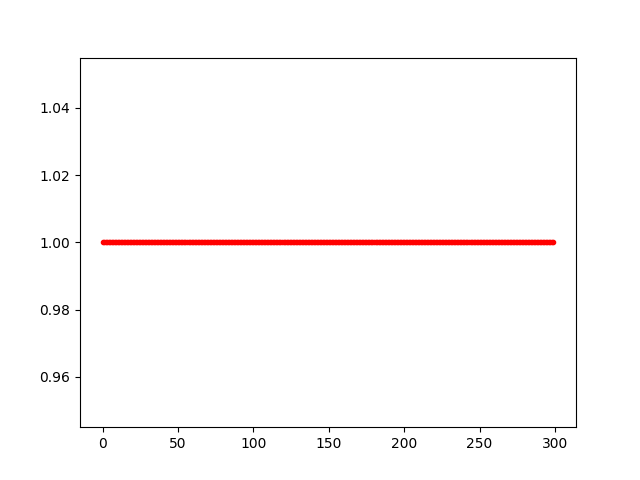

In [149]:
pc_baba_corr_1 = InterMeasures.participation_coeff(multi_ba_ba_corr_1.network, agg_net_baba_corr_1)
plt.figure()
plt.plot(np.sort(pc_baba_corr_1)[::-1], '.r')
plt.show()

## Participation Coefficient and Aggregated Degree 

In [150]:
degree_agg_erer = InterMeasures.degree_distribution(agg_net_erer)
z_score_erer = (degree_agg_erer - np.mean(degree_agg_erer)) / np.std(degree_agg_erer)

<IPython.core.display.Javascript object>


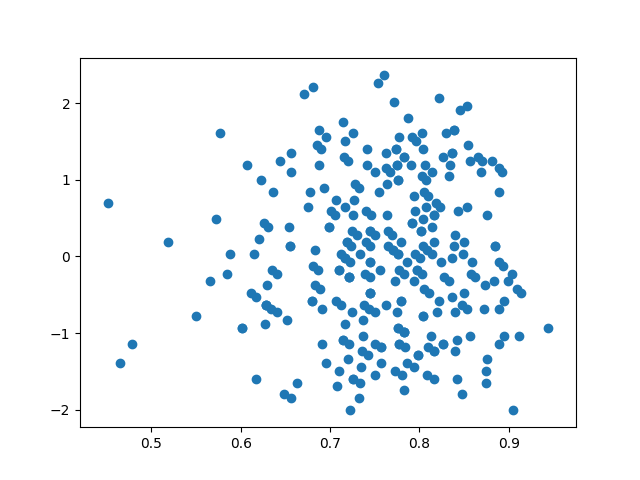

In [151]:
plt.figure()
plt.scatter(pc_erer, z_score_erer)
plt.show()

In [152]:
degree_agg_erba = InterMeasures.degree_distribution(agg_net_erba)
z_score_erba = (degree_agg_erba - np.mean(degree_agg_erba)) / np.std(degree_agg_erba)

<IPython.core.display.Javascript object>


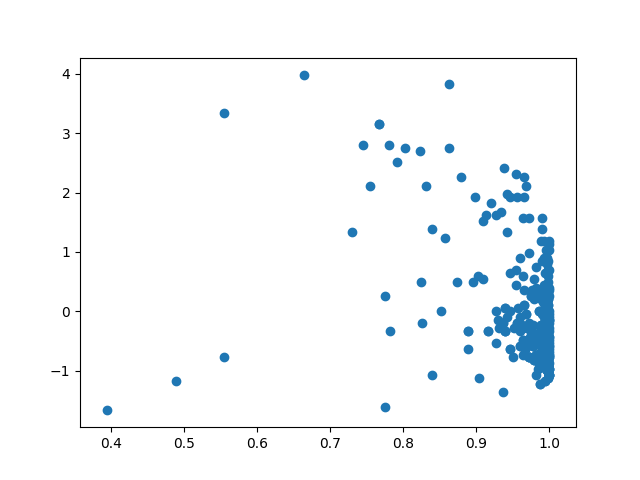

In [153]:
plt.figure()
plt.scatter(pc_erba, z_score_erba)
plt.show()

In [154]:
degree_agg_baba_nc = InterMeasures.degree_distribution(agg_net_baba_nc)
z_score_baba_nc = (degree_agg_baba_nc - np.mean(degree_agg_baba_nc)) / np.std(degree_agg_baba_nc)

<IPython.core.display.Javascript object>


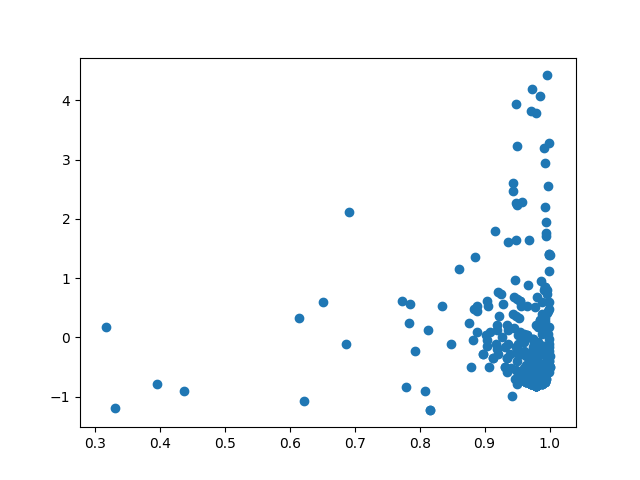

In [155]:
plt.figure()
plt.scatter(pc_baba_nc, z_score_baba_nc)
plt.show()

## Probability approach

#### ER - ER

<IPython.core.display.Javascript object>


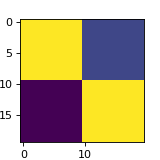

In [156]:
proba_erer = InterMeasures.link_layer_dependence(multi_er_er.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_erer = np.repeat(np.repeat(proba_erer, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_erer)
plt.show()


#### ER - BA

<IPython.core.display.Javascript object>


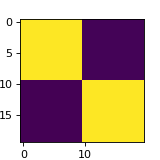

In [157]:
proba_erba = InterMeasures.link_layer_dependence(multi_er_ba.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_erba = np.repeat(np.repeat(proba_erba, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_erba)
plt.show()


#### BA-BA

<IPython.core.display.Javascript object>


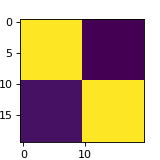

In [158]:
proba_baba_nc = InterMeasures.link_layer_dependence(multi_ba_ba_nc.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_baba_nc = np.repeat(np.repeat(proba_baba_nc, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_baba_nc)
plt.show()

#### BA-BA [Correlation]

<IPython.core.display.Javascript object>


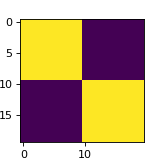

In [162]:
proba_baba_corr = InterMeasures.link_layer_dependence(multi_ba_ba_corr_1.network)
fig=plt.figure(figsize=(2, 2), dpi= 80, facecolor='w', edgecolor='k')
proba_reshaped_baba_corr = np.repeat(np.repeat(proba_baba_corr, 10, axis=0), 10, axis=1)
plt.imshow(proba_reshaped_baba_corr)
plt.show()

## Probability approach with aggregated layer

#### ER-ER

In [164]:
n_layers = multi_er_er.network.shape[-1]
layer_scores_erer = []
for layer_idx in range(n_layers):
    proba_layer_erer = InterMeasures.link_conditional(agg_net_erer, 
                                                      multi_er_er.network[:, :, layer_idx])
    layer_scores_erer.append(proba_layer_erer)
fin_scores_erer = np.sort(layer_scores_erer)
fin_arg_scores = np.argsort(layer_scores_erer)

<IPython.core.display.Javascript object>


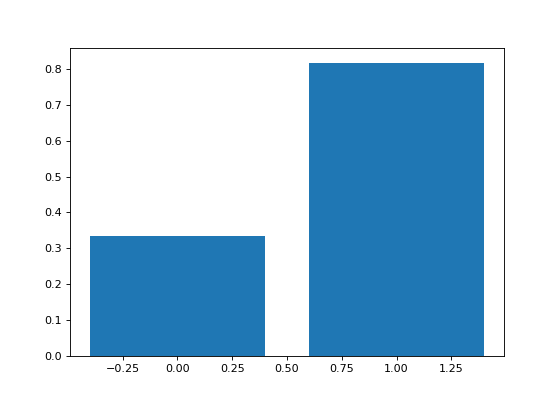

In [165]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_erer)
plt.show()

#### ER-BA

In [166]:
n_layers = multi_er_ba.network.shape[-1]
layer_scores_erba = []
for layer_idx in range(n_layers):
    proba_layer_erba = InterMeasures.link_conditional(agg_net_erba, 
                                                      multi_er_ba.network[:, :, layer_idx])
    layer_scores_erba.append(proba_layer_erba)
fin_scores_erba = np.sort(layer_scores_erba)
fin_arg_scores = np.argsort(layer_scores_erba)

<IPython.core.display.Javascript object>


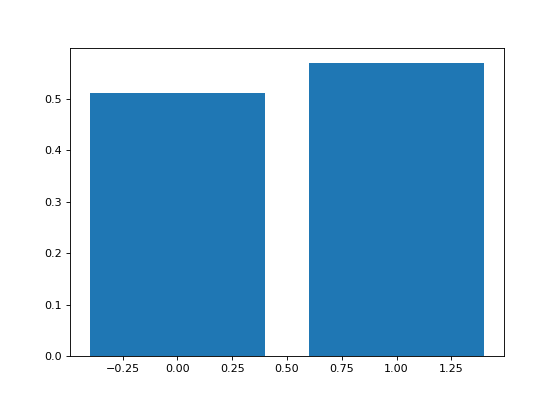

In [167]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_erba)
plt.show()

#### BA-BA 

In [169]:
n_layers = multi_ba_ba_nc.network.shape[-1]
layer_scores_baba_nc = []
for layer_idx in range(n_layers):
    proba_layer_baba_nc = InterMeasures.link_conditional(agg_net_baba_nc, 
                                                      multi_ba_ba_nc.network[:, :, layer_idx])
    layer_scores_baba_nc.append(proba_layer_baba_nc)
fin_scores_baba_nc = np.sort(layer_scores_baba_nc)
fin_arg_scores = np.argsort(layer_scores_baba_nc)

<IPython.core.display.Javascript object>


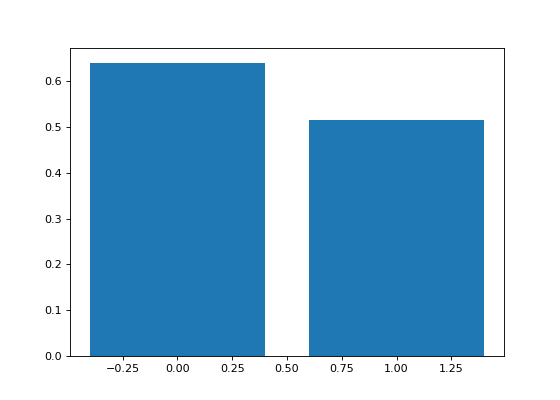

In [170]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_baba_nc)
plt.show()

#### BA-BA Correlation

In [171]:
n_layers = multi_ba_ba_corr_1.network.shape[-1]
layer_scores_baba_corr_1 = []
for layer_idx in range(n_layers):
    proba_layer_baba_corr_1 = InterMeasures.link_conditional(agg_net_baba_corr_1, 
                                                      multi_ba_ba_corr_1.network[:, :, layer_idx])
    layer_scores_baba_corr_1.append(proba_layer_baba_corr_1)
fin_scores_baba_corr_1 = np.sort(layer_scores_baba_corr_1)
fin_arg_scores = np.argsort(layer_scores_baba_corr_1)

<IPython.core.display.Javascript object>


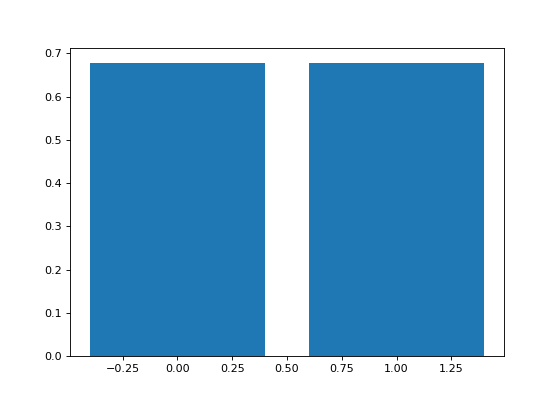

In [172]:
fig=plt.figure(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(fin_arg_scores, fin_scores_baba_corr_1)
plt.show()